In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/Users/vinittyagi/Desktop/python-base/cars/cars_2010_2020.csv')

In [5]:
df.head(5)

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65


Exploratory Data analysis

top 10 cars with the highest prices

In [10]:
top_10=df.sort_values(by='Price (USD)',ascending=False).head(10)
top_10

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
6446,Hyundai,Sonata,2011,4.7,Diesel,79998.87
6513,Toyota,RAV4,2013,1.4,Diesel,79994.55
1686,Chevrolet,Malibu,2011,2.4,Hybrid,79992.17
6348,Volkswagen,Atlas,2010,4.3,Electric,79978.02
2540,Audi,A3,2010,4.1,Diesel,79973.56
4246,Audi,A6,2016,2.3,Petrol,79969.78
729,Toyota,Highlander,2018,3.9,Electric,79956.97
3607,Mercedes-Benz,GLA,2013,2.8,Petrol,79948.67
9979,BMW,7 Series,2019,4.1,Diesel,79948.44
2337,Hyundai,Kona,2013,1.7,Diesel,79936.83


plotting using bar chart

/var/folders/jk/v9664mmj7334qvdl4t3srv840000gn/T/ipykernel_51881/1294331316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['Make'],y=top_10['Price (USD)'],palette='magma')


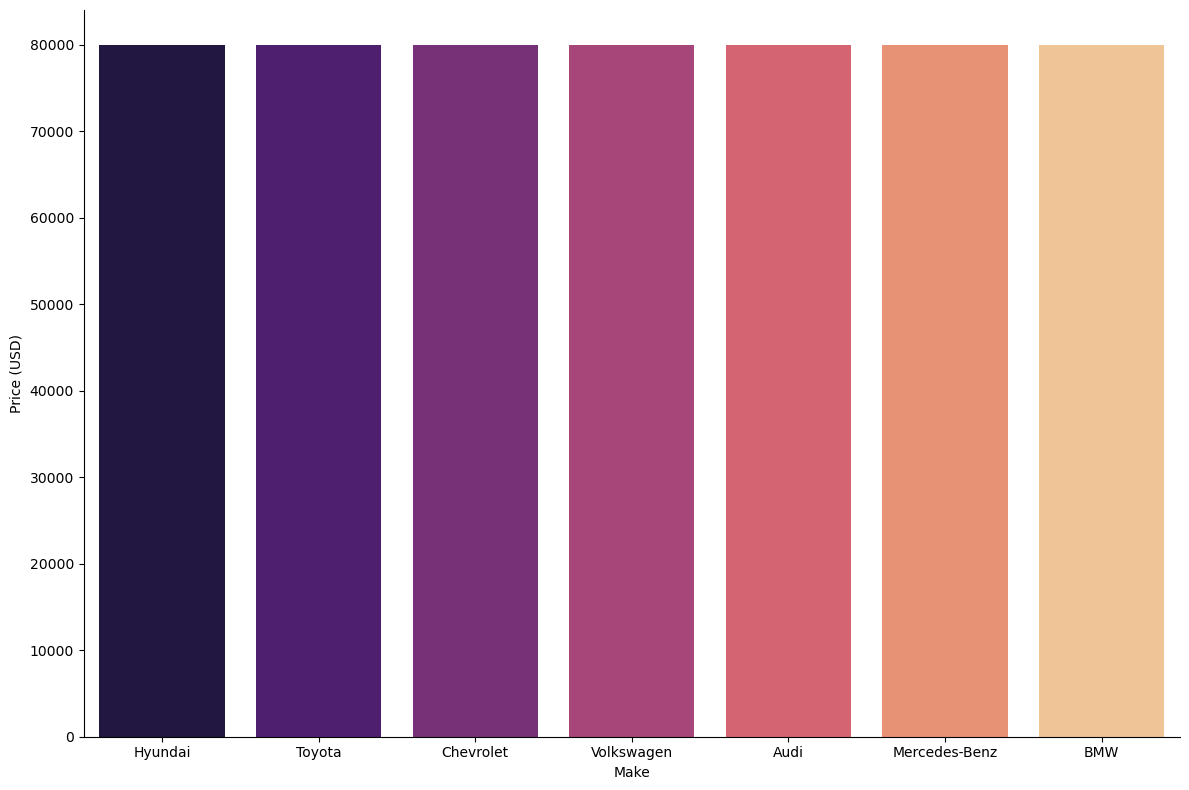

In [24]:
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f)
sns.barplot(x=top_10['Make'],y=top_10['Price (USD)'],palette='magma')

plt.tight_layout()